In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
from matplotlib import pyplot as plt


## Define Settings

In [2]:
plot_dir = 'plots/'
data_dir = 'data/'

for directory in [plot_dir, data_dir]:
    if not os.path.exists(directory):
        print('Creating plot directory:', directory)
        os.makedirs(directory)

#### Load Results

In [3]:
results = pd.read_csv('/home/pgutjahr/software/graphnet/data/examples/output/train_model_without_configs/20904_labels/dynedge_DNNLabel_TotalDepositedEnergy_example/results.csv')


In [4]:
results

,Unnamed: 0,energy_pred,DNNLabel_TotalDepositedEnergy,event_no
0,0,40.684753,15.983420,61269.0
1,1,143.116776,103.907875,131479.0
2,2,2930.474121,3945.905518,115616.0
3,3,213.015350,183.664627,17797.0
4,4,333.990997,344.980286,71741.0
...,...,...,...,...
55684,55684,867.185852,822.928711,80601.0
55685,55685,112.631981,376.347321,43454.0
55686,55686,206.014496,1832.363647,82079.0
55687,55687,399.165405,324.949219,119082.0


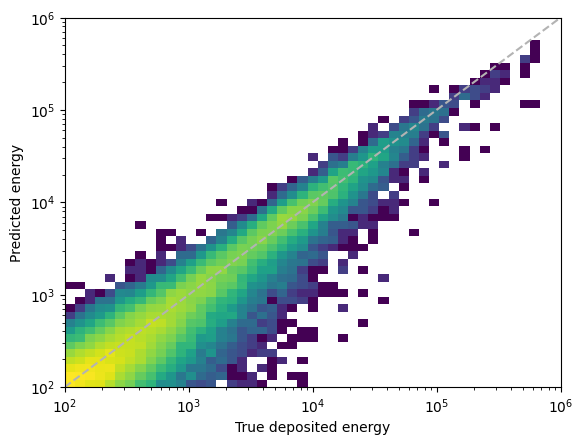

In [5]:
import numpy as np
import matplotlib

fig, ax = plt.subplots()

bins = (np.logspace(2, 6, 50), np.logspace(2, 6, 50))

ax.hist2d(
    results['DNNLabel_TotalDepositedEnergy'],
    results['energy_pred'], 
    norm=matplotlib.colors.LogNorm(),
    bins=bins,
)
ax.plot(bins[0], bins[0], ls='--', color='0.7')
ax.set_xlabel('True deposited energy')
ax.set_ylabel('Predicted energy')
ax.set_xscale('log')
ax.set_yscale('log')
fig.savefig(
    os.path.join(plot_dir, 'correlation_TotalDepositedEnergy_5epochs.png'), 
    dpi=100,
)
